# Scenario discovery - replication assignment
In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the Patient Rule Induction Method (PRIM) to identify policy vulnerabilities, develop Shared Socio-economic Pathways (SSPs), and design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

You can use use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`.

## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

In [154]:
from ema_workbench.analysis import prim
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv('data/Bryant et al 2010.csv')
data

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.25,1,99.199997,511.600006,0.45,89.099998,0.363,-0.387,1.75,-0.015,170.500000,1995,74.22,265.56,0,0
878,0.25,1,102.400002,751.400024,0.91,86.800003,0.318,-0.471,0.75,0.023,96.199997,1996,35.97,163.70,0,0
879,0.25,1,100.000000,527.000000,0.59,91.099998,0.410,-0.567,0.22,0.062,137.100006,1997,35.96,200.64,0,0
880,0.25,1,108.300003,694.200012,0.65,99.800003,0.355,-0.368,1.62,0.017,145.399994,1998,41.42,126.74,0,0


In [156]:
# Extract the experiments (columns 2–10 → index 1 to 9)
X = data.iloc[:, 1:10]

# Extract the outcome (column 15 → index 14)
y = data.iloc[:, 14]

prim_alg = prim.Prim(X, y,threshold=0.8, peel_alpha=0.15)
box1 = prim_alg.find_box()



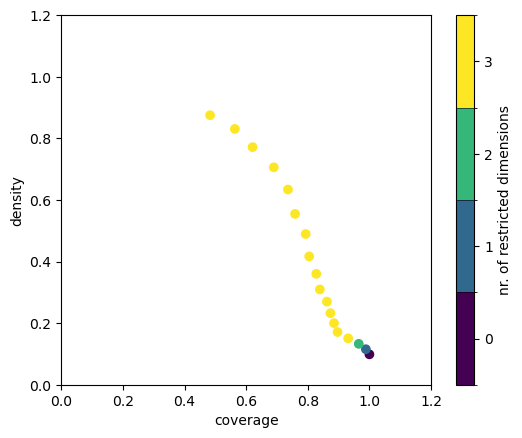

In [157]:
box1.show_tradeoff()
plt.show()

In [158]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

In [159]:
box1.inspect()

coverage     0.482759
density      0.875000
id          17.000000
k           42.000000
mass         0.054422
mean         0.875000
n           48.000000
res_dim      3.000000
Name: 17, dtype: float64

                       box 17                                    
                          min         max  qp value      qp value
Demand elasticity   -0.800000   -0.736500       NaN  2.866992e-24
Total biomass      671.100006  997.799988  0.000063           NaN
Cellulosic yield    83.049999   99.900002  0.049582           NaN



[None]

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

In [160]:
df = pd.read_csv('data/Rozenberg et al 2014.csv')

df

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,1,0,1,1,0,0,0,0,0
282,1,1,2,1,1,0,0,1,0,0,0,0
283,1,1,2,1,1,0,1,1,0,0,0,0
284,1,1,2,1,1,1,0,0,0,0,0,0


c:\Users\juliu\anaconda3\envs\gds24\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:555: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(top=-0.5, bottom=nr_unc - 0.5)


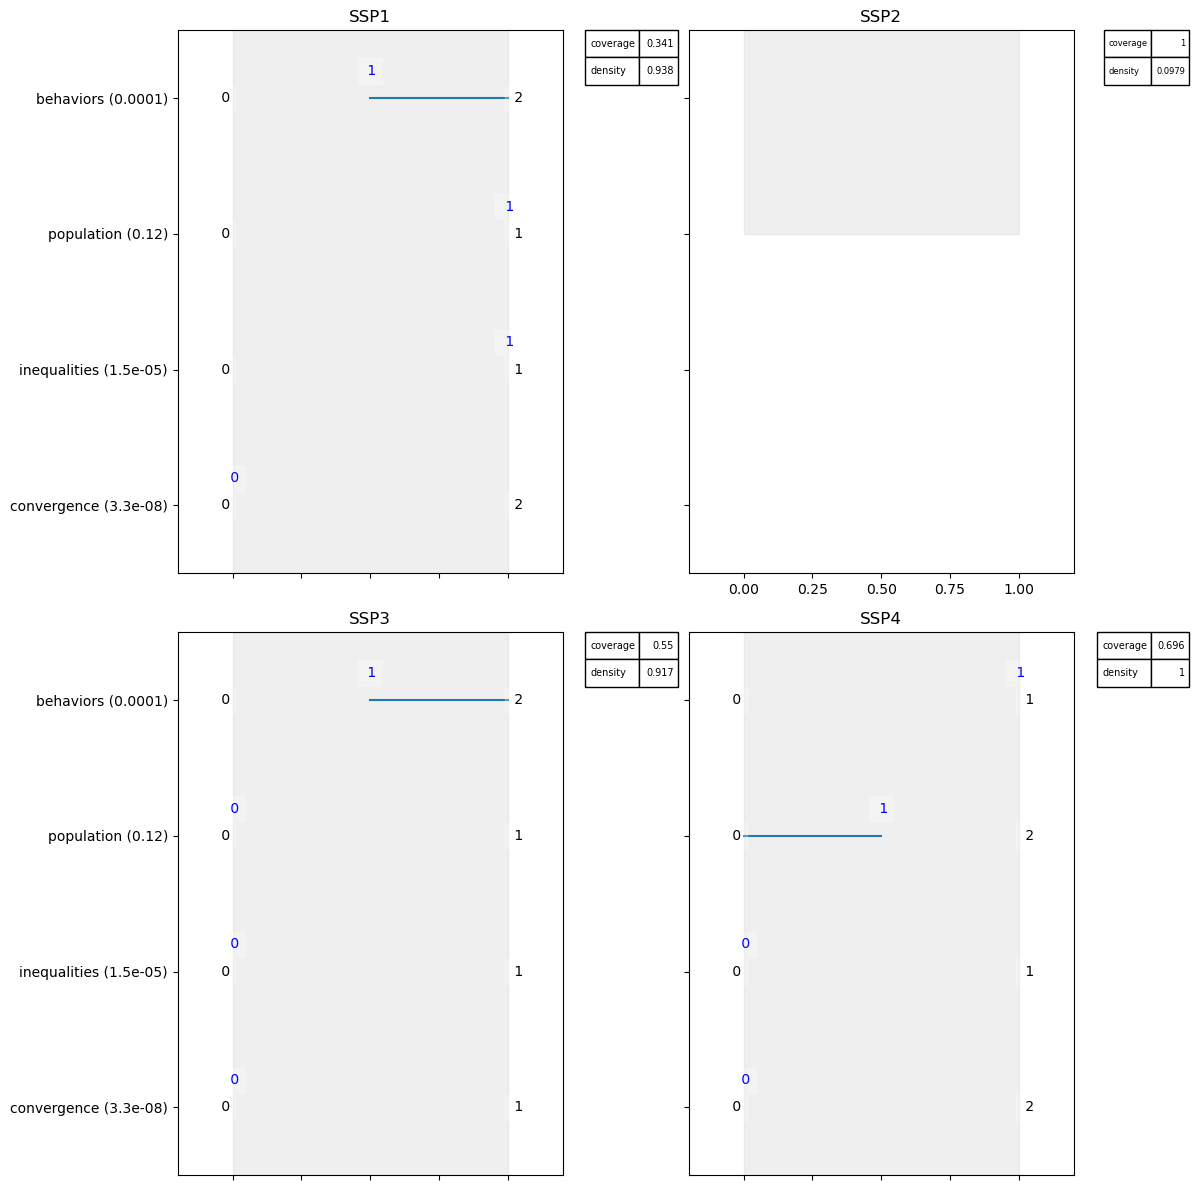

In [161]:
# Independent variables (first 7 columns)
X = df.iloc[:, :7]

# Setup for plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
axs = axs.flatten()
# Loop through each SSP
for i, ssp in enumerate(['SSP1', 'SSP2', 'SSP3', 'SSP4']):
    y = df[ssp]
    
    # Adjust threshold if needed — 0.8 is a good starting point
    prim_alg = prim.Prim(X, y, threshold=0.6)
    box = prim_alg.find_box()

    ax = axs[i]
    if box is not None:
        box.inspect(style='graph', ax=ax)
    else:
        ax.text(0.5, 0.5, 'No box found', ha='center', va='center')
    ax.set_title(ssp)

plt.tight_layout()
plt.show()

## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


(5000, 641)
[[2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]
 [2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]
 [2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]
 ...
 [2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]
 [2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]
 [2010.     2010.0625 2010.125  ... 2049.875  2049.9375 2050.    ]]
19
coverage       0.849598
density        0.333784
id             5.000000
k            740.000000
mass           0.443400
mean           0.333784
n           2217.000000
res_dim        1.000000
Name: 5, dtype: float64

         box 5                                 
           min       max qp value      qp value
r_33 -3.377941 -0.144251      NaN  1.765223e-73



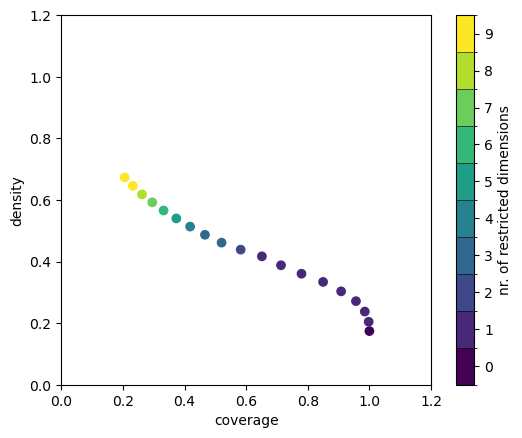

In [193]:
# To load the .gz file, you can use the load_results function
from ema_workbench import load_results
import numpy as np

# load data
fn = r"./data/Hamarat et al 2013.gz"
x, outcomes = load_results(fn)
print(np.shape(outcomes["fraction renewables"]))
print((outcomes["TIME"]))
#outcomes = y['fraction renewables']
# outcomes
# specify y
y = outcomes["fraction renewables"][:, -1] < outcomes["fraction renewables"][:, 0]
x_clean = x.select_dtypes(include=[np.number])  # keep only numeric

rotated_experiments, rotation_matrix = prim.pca_preprocess(x_clean, y)

# perform prim on modified results tuple
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.5, peel_alpha=0.15)
box = prim_obj.find_box()
# Check how many boxes exist
print(len(box.peeling_trajectory))  # e.g., 10

# Inspect a valid one (e.g., the best trade-off)
box.inspect(5)
box.show_tradeoff()

plt.show()


In [182]:
x

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year,model,policy
0,1,2,3,2,5,1,1,2,1,2,...,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007,energy,no policy
1,2,3,2,1,4,2,1,1,3,2,...,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794,energy,no policy
2,1,3,1,1,3,6,4,2,4,1,...,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390,energy,no policy
3,2,2,3,2,1,5,1,2,2,1,...,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062,energy,no policy
4,1,2,3,3,4,5,1,2,2,1,...,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439,energy,no policy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,1,3,2,4,1,3,1,...,2.443080,2048.361066,1.382122,8.360590,6.078714,4.943982,1.285286,1.013162,energy,no policy
4996,1,2,3,1,3,5,1,1,2,1,...,1.810992,2046.513779,0.706620,1.436440,4.835751,1.998337,4.328045,0.997881,energy,no policy
4997,1,1,3,1,3,4,1,3,2,1,...,0.524648,2083.535742,1.244429,2.397216,9.297792,1.033138,7.460572,0.903423,energy,no policy
4998,1,3,3,1,6,3,1,1,3,1,...,1.121825,2049.697171,0.585930,2.168406,9.630272,1.098442,9.564640,1.074167,energy,no policy
